<a href="https://colab.research.google.com/github/rjz46/Cornell-Conversational-Analysis-Toolkit/blob/master/datasets/reddit_coarse_discourse-corpus/example_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and setup

In [0]:
from IPython.display import display as disp
from zipfile import ZipFile
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
import seaborn as sns

from collections import defaultdict

print("""\n***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. \n\n""")
%load_ext autoreload


***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
#@title Change working dir if necessary before importing convokit

# UNCOMMENT AND RUN ONCE PER KERNEL, listdir() output should include "convokit"
# os.chdir('../..')

print(os.listdir())

['LICENSE.md', 'convokit', '.DS_Store', 'requirements.txt', 'Makefile', 'website', 'datasets', 'tests', 'venv_c', 'README.md', 'setup.py', '.gitignore', 'CONTRIBUTING.md', 'examples', 'doc', '.git']


In [0]:
import convokit
from convokit import Toxicity

In [0]:
# Reload convokit (and any other module) after making local changes.
print("""\n***If you see a StopIteration error, run this cell again.\n\n""")
%autoreload


***If you see a StopIteration error, run this cell again.




# Load dataset and transform

In [0]:
reddit_corpus = convokit.Corpus(filename="datasets/reddit_coarse_discourse-corpus/corpus")

In [0]:
tox = Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_coarse_discourse.json")
tox.transform(reddit_corpus)

# Sequences

In [0]:
subreddit_counter = collections.Counter()
convos = reddit_corpus.conversations


for convoutt in convos: 
    #print(convos[convoutt])
    subrd = convos[convoutt].meta["subreddit"]
    subreddit_counter.update({subrd:1})
top_25_subreddits = dict(subreddit_counter.most_common(25))

print(top_25_subreddits.keys())

dict_keys(['askreddit', 'leagueoflegends', 'buildapc', 'explainlikeimfive', 'trees', 'pcmasterrace', 'gaming', 'techsupport', 'electronic_cigarette', 'relationships', 'tipofmytongue', 'hearthstone', 'atheism', 'jailbreak', 'summonerschool', 'personalfinance', 'reddit.com', 'whowouldwin', 'destinythegame', 'movies', 'pokemon', 'starcraft', 'malefashionadvice', 'askscience', 'loseit'])


In [0]:
top_level_posts = {}
counter = 0
in_top_25 = {}

for x in convos:
    if convos[x].meta["subreddit"] in top_25_subreddits.keys():
        in_top_25[x] = convos[x]

In [0]:
utts = reddit_corpus.utterances

print(len(in_top_25))

2021


# Upvotes

In [0]:
utt_ups_tox = {}
upsvalues = []
toxvalues = []

for x in convos:
    if not utts[x].meta['ups'] == None:
        utt_ups_tox[x] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        upsvalues.append(utts[x].meta['ups'])
        toxvalues.append(utts[x].meta['toxicity'])
    else:
        utt_ups_tox[x] = [0, utts[x].meta['toxicity']]
        upsvalues.append(0)
        toxvalues.append(utts[x].meta['toxicity'])

print(list(convos.items())[10])

('t3_289m0u', Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x7fda7060f0b8>, '_id': 't3_289m0u', '_utterance_ids': ['t3_289m0u', 't1_ci8sl95', 't1_ci8ui3k', 't1_ci8ub9d'], '_usernames': None, '_meta': {'subreddit': '2007scape', 'url': 'https://www.reddit.com/r/2007scape/comments/289m0u/i_played_2007scape_when_it_was_first_released/', 'title': "I played 2007scape when it was first released, what's changed since then?", 'averagetoxicity': 0.04370849525}}))


Text(0.5, 0, 'Toxicity Score')

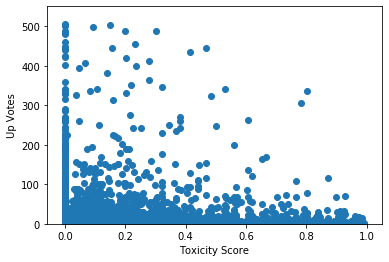

In [0]:
#print(utt_ups_tox)
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

bestfit = np.polyfit(toxvalues, upsvalues,1)
bestfitline = np.poly1d(bestfit)

plt.scatter(toxvalues, upsvalues)
plt.ylim(0,550)
plt.ylabel('Up Votes')
plt.xlabel('Toxicity Score')


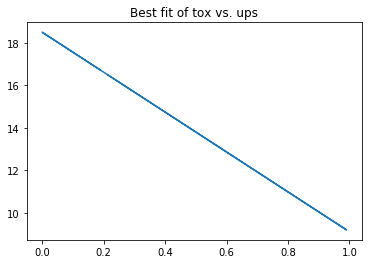

In [0]:
plt.title("Best fit of tox vs. ups")
plt.plot(toxvalues, bestfitline(toxvalues))

In [0]:
print(pearsonr(toxvalues,upsvalues)[0])

-0.014165836438686597


In [0]:
upstox_25 = {}
ups_25 = defaultdict(list)
tox_25 = defaultdict(list)

for x in in_top_25:
    if not utts[x].meta['ups'] == None:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(utts[x].meta['ups'])
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
    else:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [0, utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(0)
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
corr_25 = {}

for x in ups_25:
    corr_25[x] = pearsonr(tox_25[x],ups_25[x])[0]
   
sorted_corr = sorted(corr_25.items(), key=lambda kv: kv[1])
for x in sorted_corr:
    print(x)

('starcraft', -0.27384032357600807)
('atheism', -0.22348513909807635)
('explainlikeimfive', -0.13939416840791383)
('askscience', -0.10956977150863109)
('trees', -0.09727628835606086)
('hearthstone', -0.0970309933426117)
('tipofmytongue', -0.09066037183271945)
('buildapc', -0.07521749787184404)
('leagueoflegends', -0.06775391921410352)
('jailbreak', -0.06285257687786554)
('gaming', -0.041727481525480344)
('askreddit', -0.02767994907134295)
('electronic_cigarette', -0.02331297129980621)
('whowouldwin', 0.00402234714291879)
('pcmasterrace', 0.00446416832200411)
('personalfinance', 0.007126925299185703)
('malefashionadvice', 0.04441819503811307)
('loseit', 0.06596538002773104)
('summonerschool', 0.10341093480314038)
('pokemon', 0.11008570857269556)
('relationships', 0.1204720997965011)
('destinythegame', 0.12438564649784901)
('reddit.com', 0.13082806745092074)
('movies', 0.13592512094621084)
('techsupport', 0.14165529303857546)


# E3: Run on another dataset

## IQ2

In [0]:
iq2_corpus = convokit.Corpus(filename="datasets/iq2_corpus")


### Transform

In [0]:
#@title (Maybe) Sample corpus
utts = iq2_corpus.utterances
num_convos = None #@param
print(len(utts))

sampled_utts = []
convo_sample_ids = iq2_corpus.get_conversation_ids()
if num_convos:
  convo_sample_ids = convo_sample_ids[:num_convos]
for idx in convo_sample_ids:
  convo = iq2_corpus.get_conversation(idx)
  for utt_id in convo.get_utterance_ids():
    sampled_utts.append(convo.get_utterance(utt_id))
small_iq2_corpus = convokit.Corpus(utterances=sampled_utts)
for idx in convo_sample_ids:
  small_iq2_corpus.get_conversation(idx).meta = iq2_corpus.get_conversation(idx).meta
print("Sampled corpus with {} convos and {} utterances".format(len(small_iq2_corpus.get_conversation_ids()), len(small_iq2_corpus.get_utterance_ids())))

26562
Sampled corpus with 108 convos and 26562 utterances


In [0]:
%autoreload

In [0]:
#@title Transform
reload_from_api = False
if reload_from_api:
  tox_small_iq2 = convokit.Toxicity(api_key="Not currently used - is hardcoded", toxicity_path_to_save="convokit/toxicity/data/iq2_corpus.json")
else:
  tox_small_iq2 = convokit.Toxicity(toxicity_json_path="convokit/toxicity/data/iq2_corpus.json")

small_iq2_corpus = tox_small_iq2.transform(small_iq2_corpus)

### Toxicity vs audience votes

In [0]:
convos_dict = {}
for convo_id in small_iq2_corpus.get_conversation_ids():
  convo = small_iq2_corpus.get_conversation(convo_id)

  results = convo.meta['results']

  pre_und = results['pre']['undecided']
  post_und = results['post']['undecided']
  row = collections.OrderedDict((
  ('pre_und', pre_und),
  ('post_und', pre_und),
  ('pct_became_decided', pre_und - post_und), #  = (100-post_und) - (100-pre_und)
  ))
  row['tox'] = convo.meta['averagetoxicity']
  if results['breakdown']:
    breakdown = results['breakdown']
    row['changed_mind'] = breakdown['for_against'] + breakdown['against_for']
    row['doubled_down'] = breakdown['for_for'] + breakdown['against_against']
    row['decided'] = breakdown['undecided_for'] + breakdown['undecided_against']
    row['became_undecided'] = breakdown['for_undecided'] + breakdown['against_undecided']
    row['stayed_undecided'] = breakdown['undecided_undecided']
    row.update(breakdown)

  # results = 

  # row.update(convo.meta['results'])
  convos_dict[convo_id] = row

df = pd.DataFrame.from_dict(convos_dict, orient='index')
df.describe()

,pre_und,post_und,pct_became_decided,tox,changed_mind,doubled_down,decided,became_undecided,stayed_undecided,against_for,undecided_for,for_against,for_for,undecided_against,for_undecided,undecided_undecided,against_undecided,against_against
count,108.000000,108.000000,108.000000,108.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,30.148148,30.148148,21.814815,0.126488,13.813953,49.581395,27.837209,4.139535,4.813953,6.616279,14.372093,7.197674,25.790698,13.465116,2.395349,4.813953,1.744186,23.790698
std,8.160556,8.160556,7.933306,0.024909,4.762231,8.561354,7.428806,1.995010,1.918032,3.791967,5.964272,4.139156,11.903497,5.539249,2.037033,1.918032,1.329035,12.565179
min,8.000000,8.000000,1.000000,0.082597,5.000000,36.000000,16.000000,1.000000,1.000000,0.000000,3.000000,2.000000,9.000000,5.000000,0.000000,1.000000,0.000000,6.000000
25%,24.000000,24.000000,16.000000,0.105047,11.000000,43.500000,21.000000,2.000000,3.500000,4.000000,11.000000,4.750000,17.000000,9.500000,1.000000,3.500000,1.000000,14.000000
50%,31.000000,31.000000,21.000000,0.121065,13.000000,49.000000,27.000000,4.000000,5.000000,6.000000,14.000000,6.000000,22.000000,13.000000,2.000000,5.000000,2.000000,21.000000
75%,35.000000,35.000000,27.250000,0.143364,16.000000,54.000000,34.000000,5.500000,6.000000,9.000000,18.000000,9.000000,35.000000,17.000000,4.000000,6.000000,2.000000,31.500000
max,48.000000,48.000000,42.000000,0.186613,29.000000,70.000000,42.000000,9.000000,9.000000,20.000000,26.000000,20.000000,58.000000,26.000000,9.000000,9.000000,6.000000,53.000000


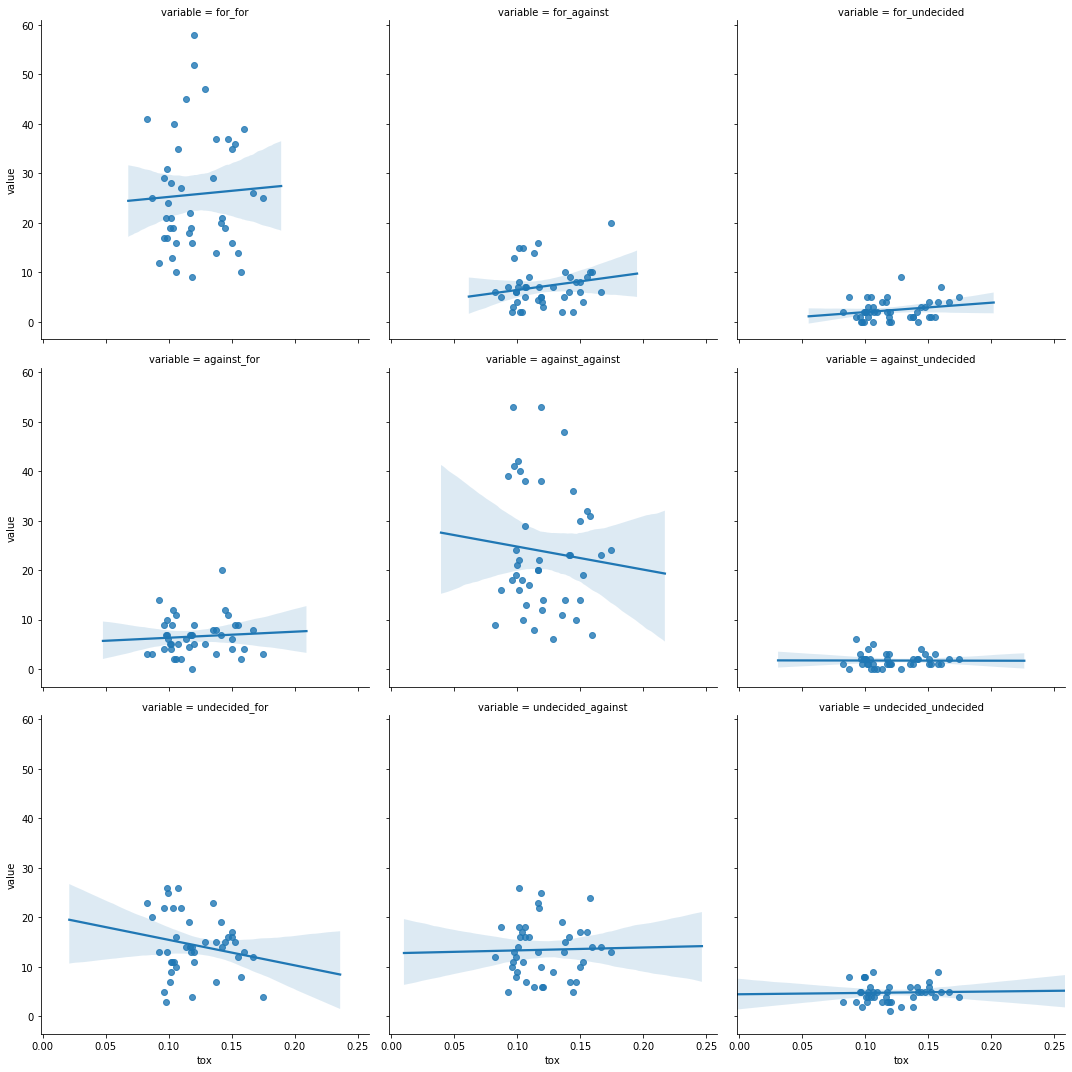

In [0]:
#@title Plot each vote combo
votes = ['for', 'against', 'undecided']
breakdowns = []
for i, start in enumerate(votes):
  for j, end in enumerate(votes):
    breakdowns.append("{}_{}".format(start, end))

b_df = df[~df.against_for.isna()]
breakdown_df = b_df.melt(id_vars=b_df.columns[~b_df.columns.isin(breakdowns)], value_vars = breakdowns)
sns.lmplot(x='tox', y='value', col='variable', col_wrap=3, data=breakdown_df)

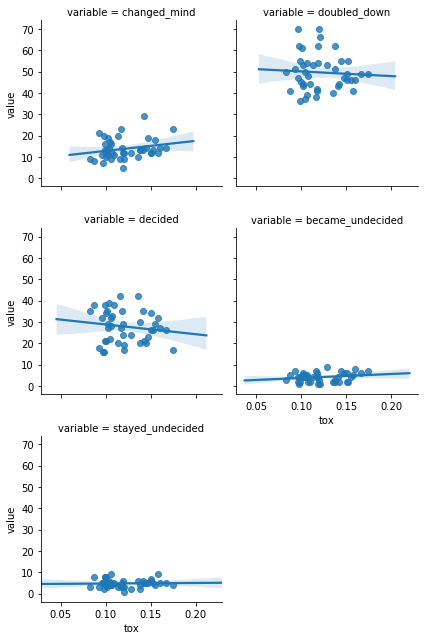

In [0]:
#@title Plot vote change categories

changes = ['changed_mind', 'doubled_down', 'decided', 'became_undecided', 'stayed_undecided']

changes_df = b_df.melt(id_vars=b_df.columns[~b_df.columns.isin(changes)], value_vars = changes)
sns.lmplot(x='tox', y='value', col='variable', col_wrap=2, data=changes_df, height=3)#, ax=ax)

Text(0.5, 1, 'Absolute delta of audience undecided before vs. after')

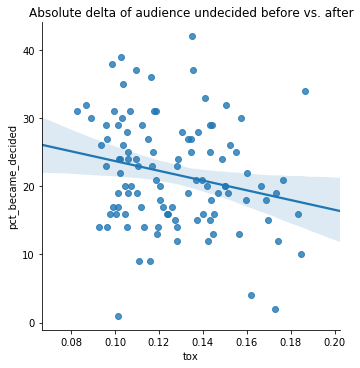

In [0]:
#@title Plot undecided delta
sns.lmplot(x='tox', y='pct_became_decided', data=df)
plt.title("Absolute delta of audience undecided before vs. after")
# df.plot(x='tox', y='delta_abs', kind='scatter')